Write your names below:

<font color='red'> Important Note: Some questions are already answered for you! </red>

*****

In [3]:
import numpy as np
import pandas as pd

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

### Read the data

In [5]:
ufo_df = pd.read_csv ('./ufo_sightings.csv', header=None,low_memory=False)
ufo_df.shape

(80332, 11)

In [6]:
ufo_df.columns = ['datetime_sighted', 'city', 'state', 'country', 'ushape', 'duration_seconds', 'duration_text', 'description_text', 'date_recorded', 'lat', 'long']

In [7]:
ufo_df.head()

,datetime_sighted,city,state,country,ushape,duration_seconds,duration_text,description_text,date_recorded,lat,long
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [8]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime_sighted    80332 non-null object
city                80332 non-null object
state               74535 non-null object
country             70662 non-null object
ushape              78400 non-null object
duration_seconds    80332 non-null object
duration_text       80332 non-null object
description_text    80317 non-null object
date_recorded       80332 non-null object
lat                 80332 non-null object
long                80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


## Understanding the problem

**Description of the problem**

We would like to build a model to predict the geographic location: UFO sighting from its other characteristics. But this data set contains 5 variables that represent location: city, state, country, latitude, and longitude. Therefore we need to choose one of them as the target variable, and remove the other 4 variables.  We choose to predict *country*.

Thus our goal is to build a model for predicting *country* from other non-location variables.

**Questions**:  answer the following question based on the information given above.

1. What is the **target** attribute?
2. What are the **predictor** attributes?
3. Is this a **classification** task or a **regression** task? Explain.

In [9]:
ufo_df.country.nunique()

5

In [10]:
ufo_df.country.unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [11]:
ufo_df.country.value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

****

## Understanding the data

**Questions**:

1. Based on the descriptions given in the data dictionary, what is the **_true_** data type of each column?
2. In how many countries do these UFO sightings occur? What are those countries?
3. What is the common denominator among these countries?

In [12]:
ufo_df.country.nunique()

5

In [13]:
ufo_df.country.unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [14]:
ufo_df.country.value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

***

## Data cleaning

### Manual feature selection

Below you will remove attributes that are redundant/duplicate or useless for building the model for predicting *country* from other non-location variables.

Remember that manual feature selection is done **based only** on descriptions of the variables and understanding of the probem. No programming is required.

**Questions**:

1. Create a new data frame called `ufo_df_sub` that is a copy of `ufo_df`; use the `copy` method.

2. Remove all location columns from `ufo_df_sub` except country (i.e. city, state, lat, and long). Use the `drop` method.

3. Which of the remaining variables in `ufo_df_sub` should be removed because they are **redundant** or **duplicate** of another variable? Explain.

4. Which of the remaining variables in `ufo_df_sub` should be removed because they are **useless**: totally unrelated to the target variable?  *Hint*: unstructured variables are *not* useless; they just need to be transformed ...

5. Modify `ufo_df_sub` by removing the columns that you identified in the previous two questions.

In [15]:
# Q.1  THIS IS ALREADY DONE FOR YOU
ufo_df_sub = ufo_df.copy()
ufo_df_sub.shape

(80332, 11)

In [16]:
# read documentation of drop() method
# ?ufo_df.drop

In [17]:
# Q.2  THIS IS ALREADY DONE FOR YOU
ufo_df_sub = ufo_df_sub.drop(columns=['city', 'state', 'lat', 'long'], axis=1)
ufo_df_sub.shape                           

(80332, 7)

In [18]:
ufo_df_sub

,datetime_sighted,country,ushape,duration_seconds,duration_text,description_text,date_recorded
0,10/10/1949 20:30,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004
1,10/10/1949 21:00,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005
2,10/10/1955 17:00,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008
3,10/10/1956 21:00,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004
4,10/10/1960 20:00,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004
5,10/10/1961 19:00,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007
6,10/10/1965 21:00,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006
7,10/10/1965 23:45,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999
8,10/10/1966 20:00,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009
9,10/10/1966 21:00,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005


In [19]:
ufo_df_sub.columns

Index(['datetime_sighted', 'country', 'ushape', 'duration_seconds',
       'duration_text', 'description_text', 'date_recorded'],
      dtype='object')

In [20]:
ufo_df_sub=ufo_df_sub.drop(columns=['duration_text','date_recorded'],axis=1)

In [21]:
ufo_df_sub.shape

(80332, 5)

In [22]:
ufo_df_sub.head()

,datetime_sighted,country,ushape,duration_seconds,description_text
0,10/10/1949 20:30,us,cylinder,2700,This event took place in early fall around 194...
1,10/10/1949 21:00,NaN,light,7200,1949 Lackland AFB&#44 TX. Lights racing acros...
2,10/10/1955 17:00,gb,circle,20,Green/Orange circular disc over Chester&#44 En...
3,10/10/1956 21:00,us,circle,20,My older brother and twin sister were leaving ...
4,10/10/1960 20:00,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...


### Drop missing data

Let's remove some of the rows where certain columns have missing values. We're going to look at the length_of_time column, the state column, and the type column. If any of the values in these columns are missing, we're going to drop the rows.

**Questions**:  (use data in `ufo_df_sub`)

1. how many values are missing in each column?
2. Remove all rows that contain any missing values by calling the `dropna` method.
3. What is the shape of the new data frame? How many rows were removed?

In [23]:
#Q1

ufo_df_sub.isna().sum()

datetime_sighted       0
country             9670
ushape              1932
duration_seconds       0
description_text      15
dtype: int64

In [24]:
ufo_df_sub.isnull().sum()

datetime_sighted       0
country             9670
ushape              1932
duration_seconds       0
description_text      15
dtype: int64

In [25]:
# read documentation of dropna method
?ufo_df_sub.dropna

In [26]:
#Q2

print(ufo_df_sub.shape)
ufo_df_sub.dropna(how='any', inplace=True)
print(ufo_df_sub.shape)

(80332, 5)
(68993, 5)


In [27]:
ufo_df_sub.dtypes

datetime_sighted    object
country             object
ushape              object
duration_seconds    object
description_text    object
dtype: object

### Data type conversions

The dtype of all columns is `object`, which means they are encoded as text. Therefore some type conversions are necessary.

**Questions**: (use data in `ufo_df_sub`)

1. Change the type of the numeric variables to float by calling `astype()` method. Put the result in the **same** column in `ufo_df_sub`.
2. For the sake of simplicity, DO NOT modify the type of categorical variables to `cateory`.
3. Change the type of date/time variables using `pd.to_datetime()` function.
4. Verify your results by displaying `ufo_df_sub.dtypes`

In [28]:
#Q1
ufo_df_sub['duration_seconds']=ufo_df_sub.duration_seconds.astype('float')

In [29]:
#Q3

In [30]:
#?pd.to_datetime

In [31]:
# THIS IS ALREADY DONE FOR YOU!
if "datetime_sighted" in ufo_df_sub.columns:
    ufo_df_sub["datetime_sighted"] = pd.to_datetime(ufo_df_sub.datetime_sighted, errors='coerce')

In [32]:
#Q4  Verify your results
ufo_df_sub.dtypes

datetime_sighted    datetime64[ns]
country                     object
ushape                      object
duration_seconds           float64
description_text            object
dtype: object

## Feature engineering

### Feature engineering of numeric columns

In this section, you'll investigate the useful numeric variables in this dataset and determine whether they should be scaled and/or log-normalized.

**Questions**:   (use data in `ufo_df_sub`)

1. Plot the distribution of the duratin_seconds columns using a histogram and/or boxplot.
2. Using `np.log` function perform log normalization on the `duration_seconds` column (because it is very skewed). Put the result in a new column in `ufo_df_sub` called `duration_sec_lg`.
3. Using the `StandardScaler` class perform standard scaling on the `duration_sec_lg` variable. Store the result in a new column in `ufo_df_sub` called `duration_sec_lg_scaled`.
4. Plot the distribution of the new columns. Is its distribution near symmetric?

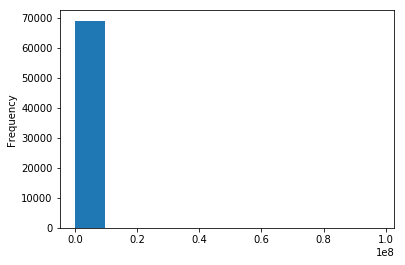

In [33]:
# Plot distribution
ufo_df_sub.duration_seconds.plot.hist()

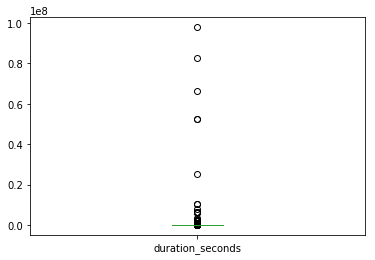

In [35]:
ufo_df_sub.duration_seconds.plot.box()

In [39]:
# Log normalization
ufo_df_sub['duration_sec_lg_scaled']=np.log(ufo_df_sub.duration_seconds)

In [42]:
ufo_df_sub[['duration_seconds','duration_sec_lg_scaled']].head()

,duration_seconds,duration_sec_lg_scaled
0,2700.0,7.901007
2,20.0,2.995732
3,20.0,2.995732
4,900.0,6.802395
5,300.0,5.703782


In [43]:
# Standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


In [44]:
ufo_df_sub['duration_seconds_lg'] = sc.fit_transform(ufo_df_sub[['duration_seconds_lg_scaled']]).ravel()
ufo_df_sub[['duration_seconds_lg','duration_seconds_lg_scaled']].head()

KeyError: "None of [Index(['duration_seconds_lg_scaled'], dtype='object')] are in the [columns]"

In [ ]:
# Plot the distribution of the NEW column


### Feature engineering of categorical columns

**Questions**:   (use data in `ufo_df_sub`)

1. How many categories does the `ushape` column have?
2. Modify the `ushape` column by combining all the sparse categories (those that occur less than 50 times) into a single category called `other`.
3. How many categories does the `ushape` column now contain?
4. Using the `pd.get_dummies` function, apply one-hot encoding on the `ushape` column. Store the result in a new data frame called `ushape_hot`.
5. What is the size of the new data frame? is it correct?

### Feature engineering of unstructured columns

#### Time/date columns

**Questions**:   (use data in `ufo_df_sub`)

Answer the following questions ONLY IF you have selected the date attributes as being useful.

1. Create two new variables that contain the month and year of the `datetime_sighted` column.
2. Create two new variables that contain the month and year of the `date_recorded` column.

In [ ]:
# Q. 1   THIS IS ALREADY DONE FOR YOU. JUST EXECUTE THIS CELL

# Extract the month from the date column
ufo_df_sub["month_sighted"] = ufo_df_sub["datetime_sighted"].map(lambda row: row.month)

# Extract the year from the date column
ufo_df_sub["year_sighted"] = ufo_df_sub["datetime_sighted"].map(lambda row: row.year)

# Take a look at the new columns to make sure everything is okay
ufo_df_sub[["datetime_sighted", "month_sighted", "year_sighted"]].head()

In [ ]:
# Q. 2  SEE THE PREVIOUS CELL FOR INSPIRATION!



#### Text columns
Let's transform the `description_text` column in the UFO dataset into tf/idf vectors, since there's likely something we can learn from this field.

**Questions**:

1. Execute the cells below
2. How many columns are there in the result matrix?
3. What does the first column in this matrix represent?

In [45]:
## Let's first take a look at the head of the description field
ufo_df_sub.description_text.head()

0    This event took place in early fall around 194...
2    Green/Orange circular disc over Chester&#44 En...
3    My older brother and twin sister were leaving ...
4    AS a Marine 1st Lt. flying an FJ4B fighter/att...
5    My father is now 89 my brother 52 the girl wit...
Name: description_text, dtype: object

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TfidfVectorizer class
vec = TfidfVectorizer(max_df=0.8,min_df=10,max_features=50,stop_words='english')

# transform each description to a vector of numeric attributes using the vec object
# we obtain a nxm matrix , where each column corresponds 
desc_tfidf = vec.fit_transform(ufo_df_sub.description_text)

In [47]:
type(desc_tfidf)

scipy.sparse.csr.csr_matrix

In [48]:
desc_tfidf.shape

(68993, 50)

In [50]:
# The vocabulary words corresponding to each column in desc_tfidf  
len(vec.get_feature_names())

50

****

## Put final set of attributes in new data frame (TP5)

We are going to combine all the attributes that we selected into one data frame.

## Build prediction model (TP5)